In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
import tweepy as tw #for accessing Twitter API


#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

pd.options.plotting.backend = "plotly"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
df = pd.read_csv('data - data.csv').drop(columns=['Unnamed: 3'])


In [46]:
df = df[df['rate'] != 3]
df
'''
Loại những giá trị ở cột column có giá trị = 3
'''

'\nLoại những giá trị ở cột column có giá trị = 3\n'

In [47]:
# Function to convert score to sentiment
def to_sentiment(rating):
    
    rating = int(rating)
    
    # Convert to class
    if rating <= 2:
        return 0
    else:
        return 1

# Apply to the dataset 
df['sentiment'] = df.rate.apply(to_sentiment)
'''
Apply hàm to_sentiment để xử lý giá trị của data cột rate
'''

'\nApply hàm to_sentiment để xử lý giá trị của data cột rate\n'

c:\Users\ASUS\anaconda3\envs\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\envs\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\envs\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'review sentiment')

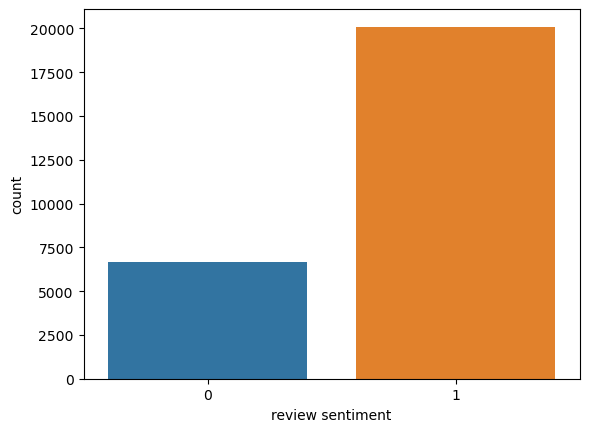

In [48]:
# # Plot the distribution
class_names = ['negative', 'positive']
'''
- Tạo 2 class: Negative n Positive
'''
sns.countplot( x='sentiment',data = df)
plt.xlabel('review sentiment')
# ax.set_xticklabels(class_names)

In [49]:
from sklearn.utils import resample

df_majority = df[(df['sentiment'] == 1)]
df_minority = df[(df['sentiment'] == 0)]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=20093, # to match majority class
                                 random_state=42)

df1 = pd.concat([df_minority_upsampled, df_majority])
''' 
- Xử lý unbalanced data bằng cách over sampling
'''


' \n- Xử lý unbalanced data bằng cách over sampling\n'

In [50]:
df1

,comment,label,rate,sentiment
4423,"Vải cực kì xấu, áo nhìn như áo cũ.",NEG,1,0
25555,Chỉ có túi nhỏ quá k dùng đc j 🤣.,NEG,1,0
24904,Chất lượng sản phẩm tạm được.giống hình.,NEG,2,0
24802,Vải mỏng lắm.,NEG,1,0
18434,Áo vải kp gió thất vọng shop.,NEG,1,0
...,...,...,...,...
31453,Giao hàng nhanh.,POS,5,1
31456,Quần rất đẹp.,POS,5,1
31457,Hàng đẹp đúng giá tiền.,POS,5,1
31458,Chất vải khá ổn.,POS,4,1


In [51]:
X = df1['comment']


In [52]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(df['sentiment'])

In [53]:
print(X)
print(Y)

4423                    Vải cực kì xấu, áo nhìn như áo cũ.
25555                    Chỉ có túi nhỏ quá k dùng đc j 🤣.
24904             Chất lượng sản phẩm tạm được.giống hình.
24802                                        Vải mỏng lắm.
18434                        Áo vải kp gió thất vọng shop.
                               ...                        
31453                                     Giao hàng nhanh.
31456                                        Quần rất đẹp.
31457                              Hàng đẹp đúng giá tiền.
31458                                     Chất vải khá ổn.
31459    áo rất ok nhé , vải mịn , len cao cổ này phối ...
Name: comment, Length: 40186, dtype: object
[1 1 0 ... 1 1 1]


In [54]:
y = pd.get_dummies(df1['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

c:\Users\ASUS\anaconda3\envs\python39\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [56]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df1['comment'][0])
X, tokenizer = tokenize_pad_sequences(df1['comment'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 Áo bao đẹp ạ!!
After Tokenization & Padding 
 [ 19 163 329  63  10 137  34  10 330   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [57]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [58]:
y = pd.get_dummies(df1['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)



Train Set -> (24111, 50) (24111, 2)
Validation Set -> (8037, 50) (8037, 2)
Test Set -> (8038, 50) (8038, 2)


In [59]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [60]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(learning_rate=learning_rate, momentum=momentum, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

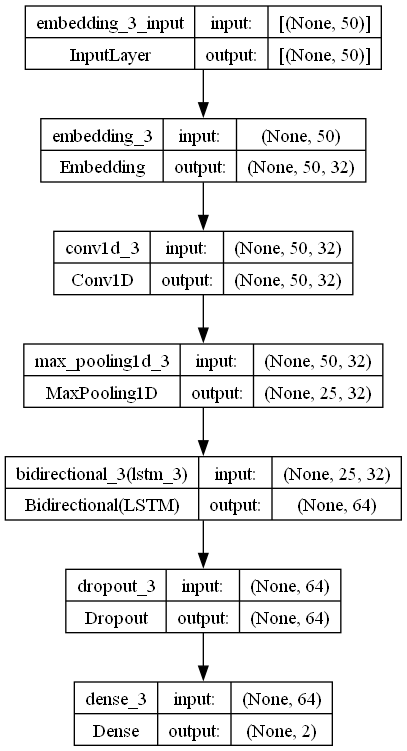

In [61]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [62]:
print(model.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 32)            160000    
                                                                 
 conv1d_3 (Conv1D)           (None, 50, 32)            3104      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 25, 32)            0         
 g1D)                                                            
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                

In [63]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9461
Precision : 0.9461
Recall    : 0.9461
F1 Score  : 0.9461


In [67]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_test is one-hot encoded
y_test_labels = np.argmax(y_test, axis=1)

# Assuming y_pred is the output from your model
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_test_labels, y_pred_labels, target_names=['Negative', 'Positive']))


252/252 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

    Negative       0.93      0.97      0.95      4036
    Positive       0.96      0.93      0.94      4002

    accuracy                           0.95      8038
   macro avg       0.95      0.95      0.95      8038
weighted avg       0.95      0.95      0.95      8038



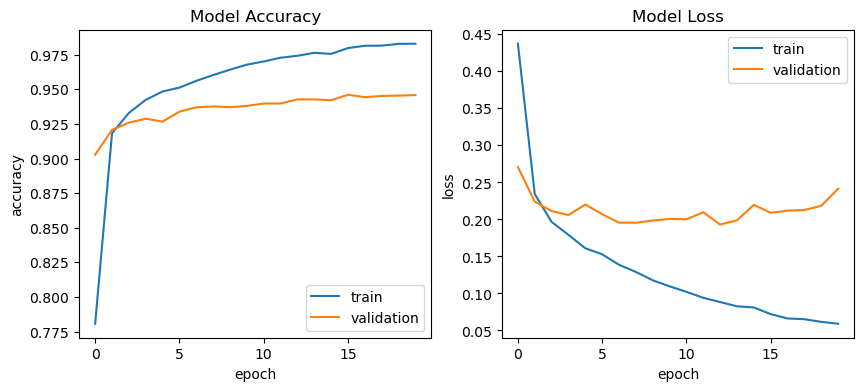

In [68]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

252/252 [==============================] - 1s 3ms/step


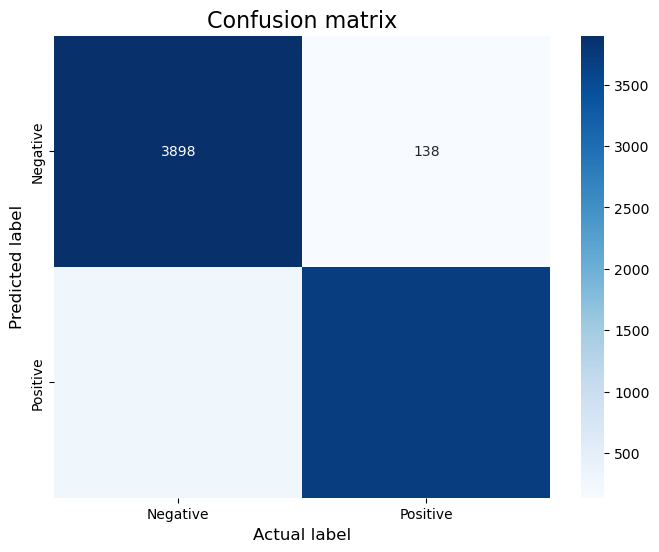

In [70]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

252/252 [==============================] - 1s 3ms/step


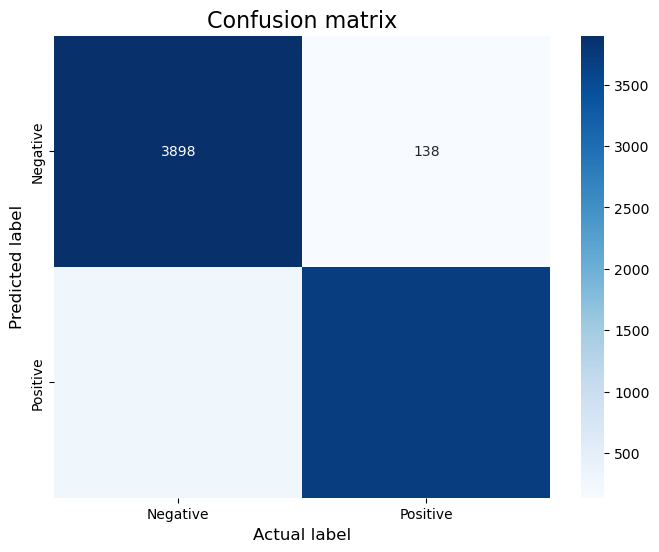

In [72]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Positive']  # Include all classes
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test), axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    plt.show()

# Example usage
plot_confusion_matrix(model, X_test, y_test)


In [73]:
# Save the model architecture & the weights
model.save('new-lstm-model.h5')
print('Best model saved')

Best model saved


c:\Users\ASUS\anaconda3\envs\python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [75]:
from keras.models import load_model

# Load model
model = load_model('new-lstm-model.h5')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''
    
    sentiment_classes = ['Negative', 'Positive']
    max_len=50
    
    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [77]:
predict_class(['Bộ đồ này đẹp'])


1/1 [==============================] - 0s 14ms/step
The predicted sentiment is Positive


In [78]:
predict_class(['Quần quá rộng'])


1/1 [==============================] - 0s 16ms/step
The predicted sentiment is Negative


In [79]:
predict_class(['Áo không đúng như hình'])


1/1 [==============================] - 0s 16ms/step
The predicted sentiment is Negative
